# 第 8 章第 2 节-SVM 三个核函数的研究

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 绘制超平面
def plot_hyperplane(clf, X, y, h=0.02, draw_sv=True, title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(
            X[y == label][:, 0],
            X[y == label][:, 1],
            c=colors[label],
            marker=markers[label])
    # 是否绘制支持向量
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

如果数据是线性可分的，就使用线性核。

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.3)

In [7]:
X.shape

(100, 2)

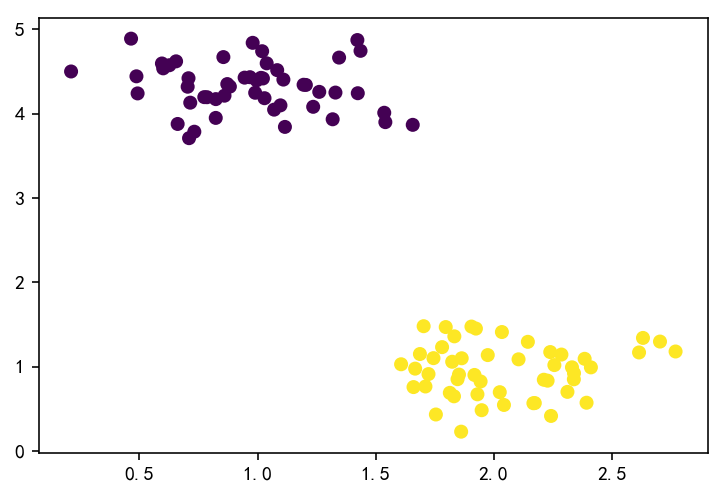

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

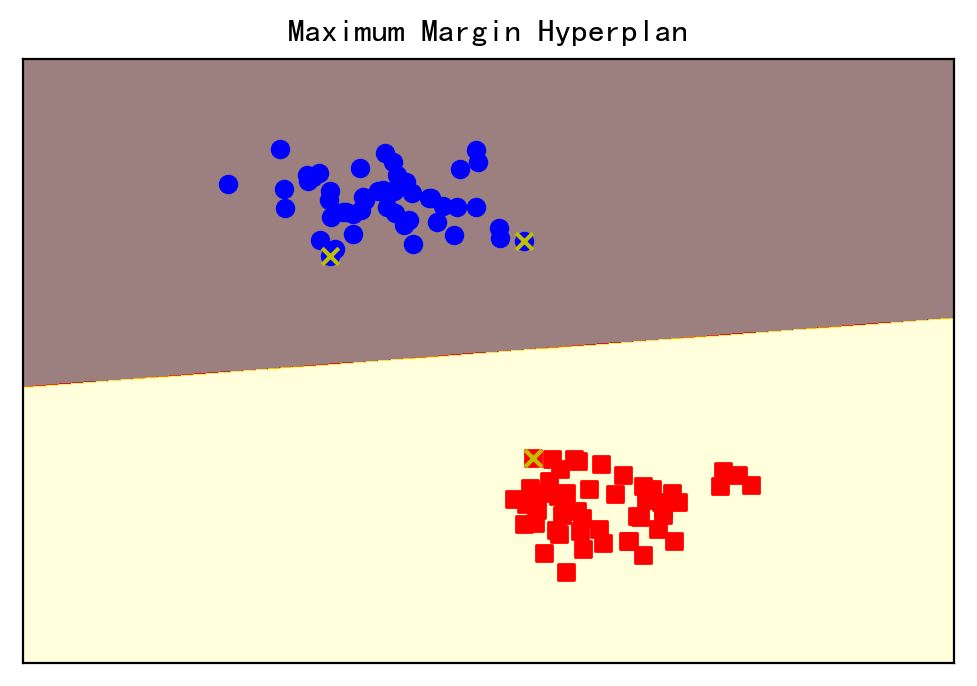

In [12]:
from sklearn import svm

clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, y)

plt.figure(dpi=100)
plot_hyperplane(clf, X, y, h=0.01, title='Maximum Margin Hyperplan')
plt.show()

SVM 得到的超平面有最大的间隔。

## 线性核、多项式核、高斯核比较

In [13]:
X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=0.8)

In [14]:
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


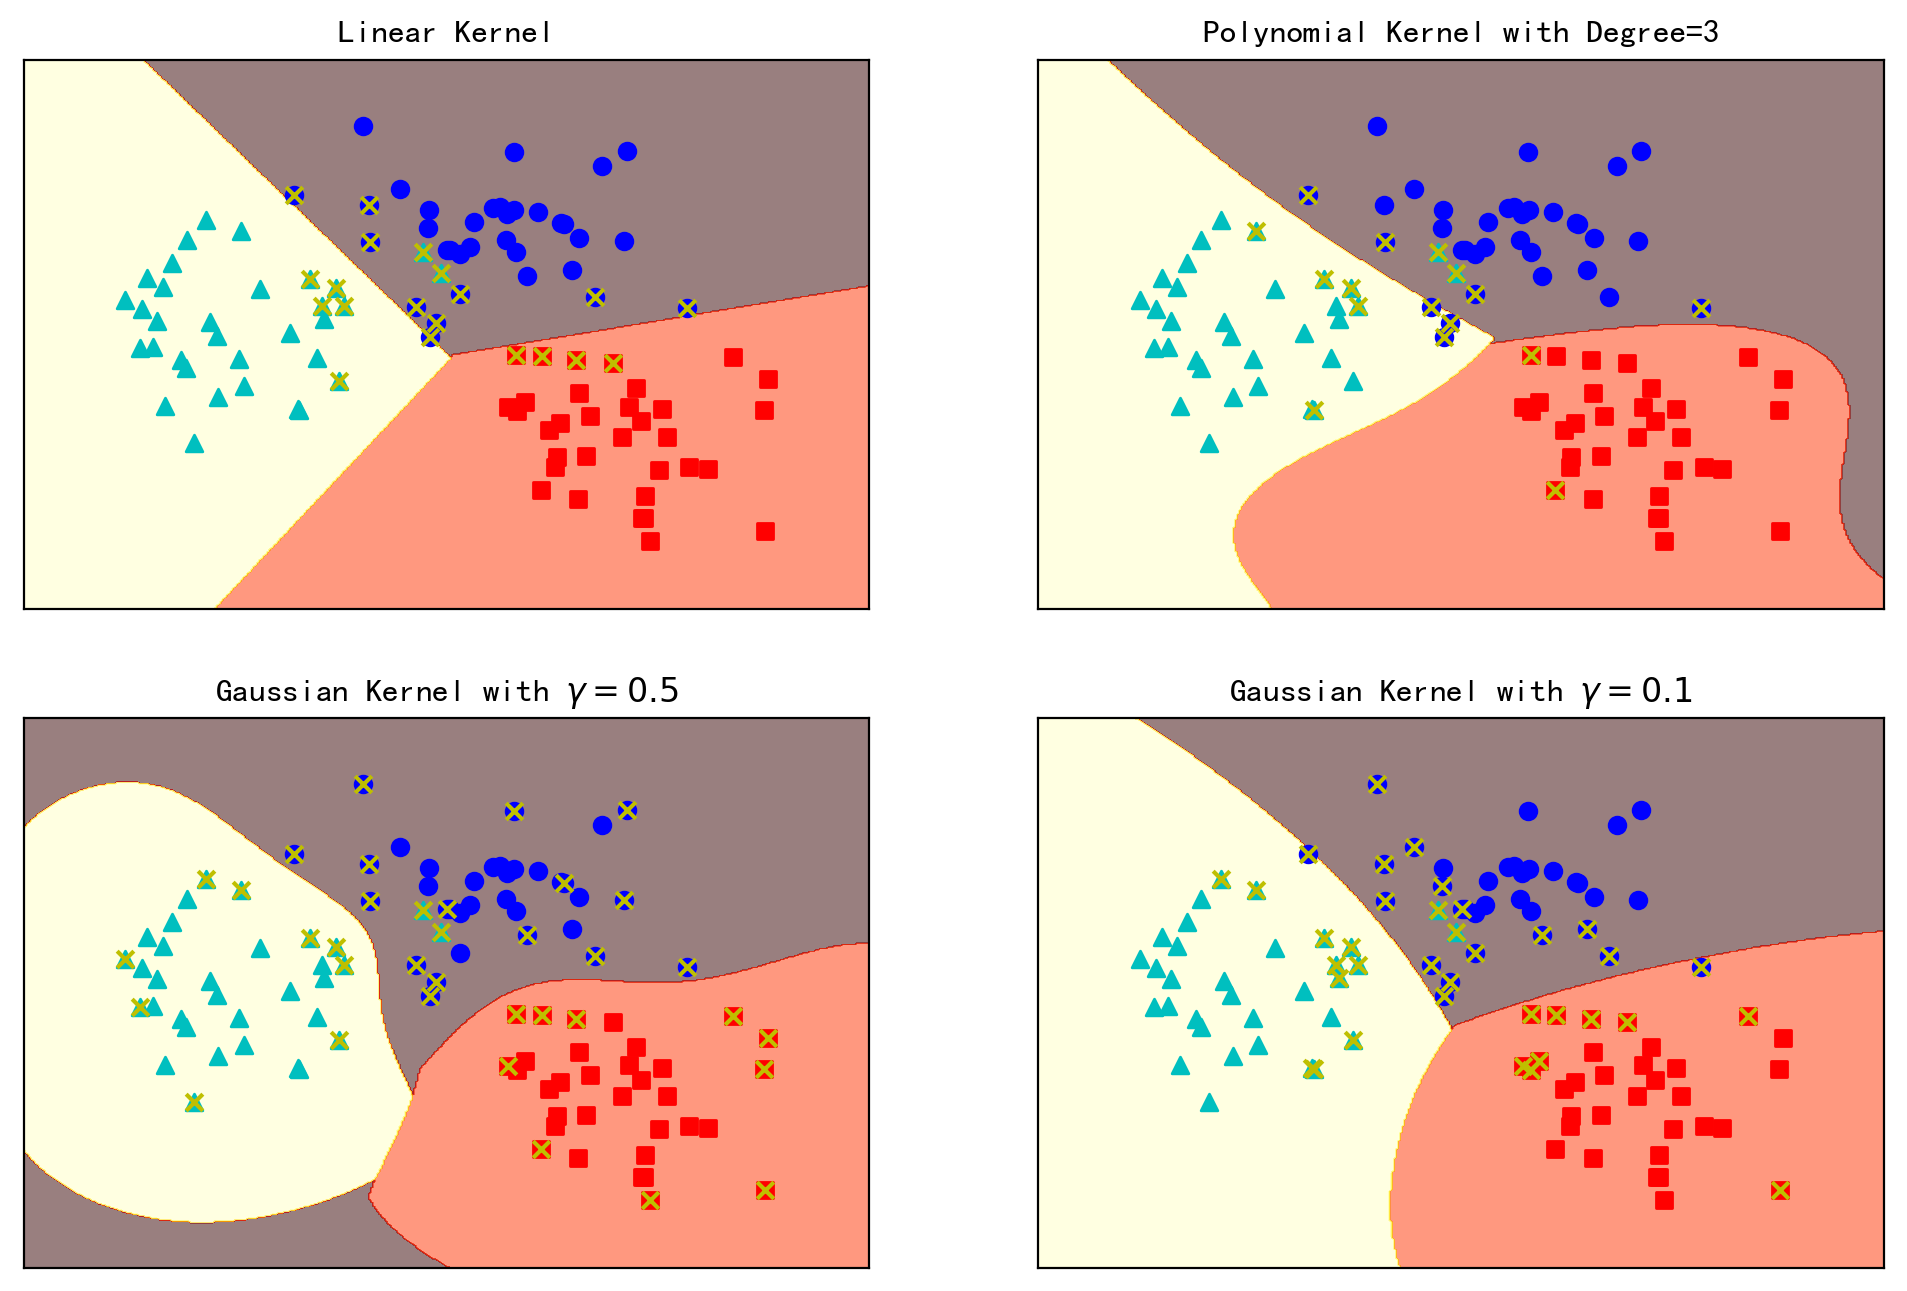

In [17]:
plt.figure(figsize=(12, 8), dpi=100)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = [
    'Linear Kernel', 'Polynomial Kernel with Degree=3',
    'Gaussian Kernel with $\gamma=0.5$', 'Gaussian Kernel with $\gamma=0.1$'
]
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i + 1)
    plot_hyperplane(clf, X, y, title=titles[i])
plt.show()